In [1]:
# imports
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

import urllib
from bs4 import BeautifulSoup
url = "https://en.wikipedia.org/wiki/List_of_earthquakes_in_the_United_States"
page = urllib.request.urlopen(url)
soup = BeautifulSoup(page, "html.parser")

In [2]:
# List of strongest earthquakes by states and territories (Bottom Table)

all_sortable_tables = soup.find_all("table", class_="wikitable sortable")
bottom_table = all_sortable_tables[1]
print("Bottom TABLE:" + str(bottom_table) + "\n")

Bottom TABLE:<table class="wikitable sortable">
<caption>
</caption>
<tbody><tr>
<th>State(s)
</th>
<th>Magnitude
</th>
<th>Date
</th>
<th>Further information
</th></tr>
<tr>
<td><span class="flagicon"><img alt="" class="thumbborder" data-file-height="400" data-file-width="600" decoding="async" height="15" src="//upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Flag_of_Alabama.svg/23px-Flag_of_Alabama.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Flag_of_Alabama.svg/35px-Flag_of_Alabama.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Flag_of_Alabama.svg/45px-Flag_of_Alabama.svg.png 2x" width="23"/> </span><a href="/wiki/Alabama" title="Alabama">Alabama</a>
</td>
<td>5.1 <a href="/wiki/Seismic_magnitude_scales#ML" title="Seismic magnitude scales"><link href="mw-data:TemplateStyles:r1038841319" rel="mw-deduplicated-inline-style"/><span class="rt-commentedText tooltip" title="'Local' mag. scale">M<sub>L</sub></span></a>
</td>
<td>18 October 1916
<

In [3]:
# Find rows in table 

A = []
B = []
C = []
D = []
for row in bottom_table.findAll('tr'):
    cells = row.findAll('td')
    if len(cells) == 4:
        A.append(cells[0].text.strip())
        B.append(cells[1].text.strip())
        C.append(cells[2].text.strip())
        D.append(cells[3].text.strip())


In [4]:
# Create the dataframe object

import pandas as pd
df = pd.DataFrame(A, columns=['State(s)'])
df['Magnitude'] = B
df['Date'] = C
df['Further information'] = D
df.head(10)


,State(s),Magnitude,Date,Further information
0,Alabama,5.1 ML,18 October 1916,1916 Irondale earthquake
1,Alaska,9.2,27 March 1964,1964 Alaska earthquake
2,Arizona,7.6,3 May 1887,1887 Sonora earthquake
3,Arkansas,7.5–7.9,16 December 1811,1811–1812 New Madrid earthquakes
4,California,7.9,9 January 1857,1857 Fort Tejon earthquake
5,Colorado,6.6,8 November 1882,[50]
6,Connecticut,4.4–5.0 Ms,16 May 1791,[51]
7,Delaware,4.1 ML,30 November 2017,[52]
8,Florida,5.9,10 September 2006,2006 Gulf of Mexico earthquake
9,Georgia (U.S. state),4.5,5 March 1914,[53]


In [5]:
# export to csv
df.to_csv('CSC221-webscrape-data.csv')

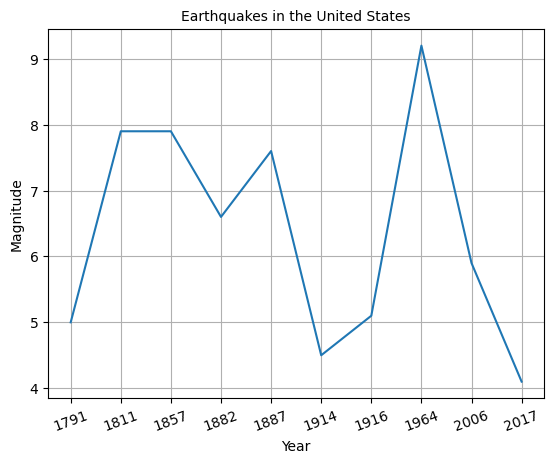

In [8]:
# Create a lineplot using Matplotlib 
# import pyplot
from matplotlib import pyplot as plt

#---------------------------------------------------
# get data from csv file
# raw_data = pd.read_csv('CSC221-webscrape-data.csv')
# get the first 10 
# array = raw_data.head(10).reset_index()
#---------------------------------------------------

# store magnitude data in a list
magnitude = [5.0, 7.9, 7.9, 6.6, 7.6, 4.5, 5.1, 9.2, 5.9, 4.1]
# store sorted year in a list
year = ['1791', '1811', '1857', '1882', '1887', '1914', '1916', '1964', '2006', '2017']
# build a lineplot
plt.plot(range(0,10), magnitude)
plt.xticks(range(0,len(year)), year, rotation = 20)
# set graph's title
plt.title('Earthquakes in the United States', fontsize = 10)
# set label of the X-axis
plt.xlabel('Year')
# set label of the Y-axis
plt.ylabel('Magnitude')
# set grid in the background
plt.grid(True)
plt.show()